# Importing Necessary Packages

In [1]:
# importing packages
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools
import seaborn as sns

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm
from sklearn.preprocessing import LabelEncoder # label encoding

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric
from sklearn.metrics import precision_score # evaluation metric
from sklearn.metrics import recall_score # evaluation metric

# Importing Data

This dataset was gethered from Kaggle:
https://www.kaggle.com/c/anomaly-detection-in-cellular-networks/data

In [2]:
df = pd.read_csv("data/ML-MATT-CompetitionQT1920_train.csv",encoding='iso-8859-1')
df.shape

(36904, 14)

Let's make sure we do not have duplicates to maintain accuracy.

In [3]:
df = df.drop_duplicates()
df.shape
# dropped about 100 duplicates

(36798, 14)

In [4]:
df.head(5)

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
0,10:45,3BLTE,11.642,1.393,0.370,0.041,15.655,0.644,1.114,1.025,4.0,3.0,7,1
1,9:45,1BLTE,21.791,1.891,0.537,0.268,10.273,1.154,1.353,1.085,6.0,4.0,10,1
2,7:45,9BLTE,0.498,0.398,0.015,0.010,0.262,0.164,0.995,0.995,1.0,1.0,2,1
3,2:45,4ALTE,1.891,1.095,0.940,0.024,60.715,0.825,1.035,0.995,2.0,2.0,4,1
4,3:30,10BLTE,0.303,0.404,0.016,0.013,0.348,0.168,1.011,1.011,2.0,1.0,3,0


Nothing looks out of the ordinary at first glance.

# Cleaning Data

First lets make sure that we imported all the columns in correctly. 

In [5]:
df.dtypes

Time            object
CellName        object
PRBUsageUL     float64
PRBUsageDL     float64
meanThr_DL     float64
meanThr_UL     float64
maxThr_DL      float64
maxThr_UL      float64
meanUE_DL      float64
meanUE_UL      float64
maxUE_DL       float64
maxUE_UL       float64
maxUE_UL+DL     object
Unusual          int64
dtype: object

It looks like all of the data types are correct except for the 'maxUE_UL+DL' column. It should be a float64 object so lets investigate that further. 

### Fix df["maxUE_UL+DL"]

In [6]:
df["maxUE_UL+DL"].unique()

array(['7', '10', '2', '4', '3', '11', '6', '8', '5', '9', '12',
       '#¡VALOR!', '14', '17', '0', '13', '15', '16', '18', '19', '1',
       '20', '23', nan, '21'], dtype=object)

By looking at all the unique values in this column we see an unwanted value of #¡VALOR! which is what is coercing this numerical value into an object data type. Lets see what is happening by looking at some of the rows with this value. 

In [7]:
issue_values = df[df["maxUE_UL+DL"] == '#¡VALOR!']
issue_values.shape

(84, 14)

In [8]:
# 84 rows of this incorrect value.
issue_values.head(20)
# Looks like '#¡VALOR!' should be nan. 

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
51,16:15,6ALTE,13.743,4.042,2.113,0.100,44.483,1.110,0.0,0.0,NaN,NaN,#¡VALOR!,0
1290,14:30,3BLTE,22.837,2.324,0.500,0.090,24.374,0.847,0.0,0.0,NaN,NaN,#¡VALOR!,0
2082,6:15,7ULTE,0.199,1.791,0.693,0.032,15.634,0.353,0.0,0.0,NaN,NaN,#¡VALOR!,1
2842,16:15,5ALTE,9.903,1.516,0.466,0.032,24.576,0.931,0.0,0.0,NaN,NaN,#¡VALOR!,0
3384,16:15,7CLTE,0.404,0.909,0.216,0.042,9.730,2.714,0.0,0.0,NaN,NaN,#¡VALOR!,0
3982,14:15,7VLTE,2.627,4.446,0.693,0.080,15.266,0.640,0.0,0.0,NaN,NaN,#¡VALOR!,0
5089,13:00,6ULTE,2.930,4.244,0.939,0.094,24.215,0.965,0.0,0.0,NaN,NaN,#¡VALOR!,0
5172,5:15,5ALTE,0.909,0.505,0.265,0.025,9.011,0.358,0.0,0.0,NaN,NaN,#¡VALOR!,0
5190,17:00,7WLTE,2.223,4.143,0.673,0.070,23.069,0.618,0.0,0.0,NaN,NaN,#¡VALOR!,0
5348,14:30,1ALTE,25.364,2.324,0.737,0.113,23.183,1.430,0.0,0.0,NaN,NaN,#¡VALOR!,0


Lets convert these incorrect values into nan.

In [9]:
df["maxUE_UL+DL"] = pd.to_numeric(df["maxUE_UL+DL"], errors='coerce')
df["maxUE_UL+DL"].unique()

array([ 7., 10.,  2.,  4.,  3., 11.,  6.,  8.,  5.,  9., 12., nan, 14.,
       17.,  0., 13., 15., 16., 18., 19.,  1., 20., 23., 21.])

After fixing our datatypes, let's make sure that all of our data types are correct

In [10]:
 df.dtypes

Time            object
CellName        object
PRBUsageUL     float64
PRBUsageDL     float64
meanThr_DL     float64
meanThr_UL     float64
maxThr_DL      float64
maxThr_UL      float64
meanUE_DL      float64
meanUE_UL      float64
maxUE_DL       float64
maxUE_UL       float64
maxUE_UL+DL    float64
Unusual          int64
dtype: object

Lets make all the columns numeric in order to feed the dataset through our algorithms. 

# Correlation Matrix

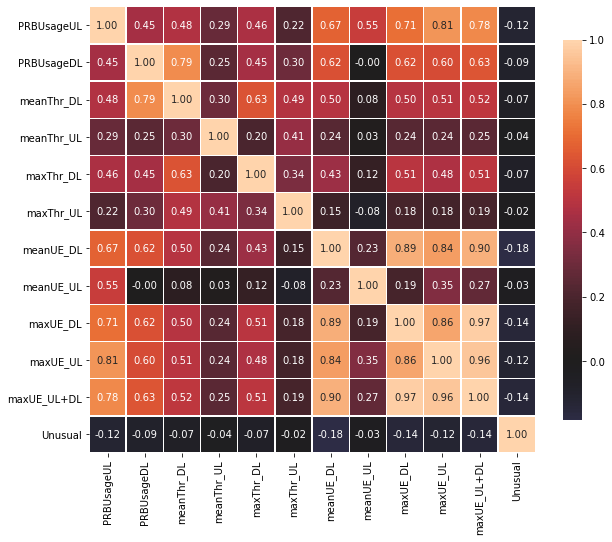

In [11]:

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df)

#### We can see that none of the features columns have strong correlations with our target variable and because of this, linear models will struggle with accuracy. 

Lets look at some summary statistics to see if we have outliers

In [12]:
df.describe()

,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
count,36798.000000,36798.000000,36798.000000,36798.000000,36798.000000,36798.000000,36798.000000,36798.000000,36709.000000,36709.000000,36709.000000,36798.000000
mean,7.857659,2.111301,0.562139,0.067804,17.815541,1.797136,1.176601,0.667058,4.202702,3.072080,7.274783,0.276645
std,8.429824,2.248888,0.728047,0.186788,15.733641,5.035245,0.205603,0.535073,1.761114,1.379887,3.032807,0.447346
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.213000,0.707000,0.142000,0.021000,5.770250,0.365000,1.041000,0.010000,3.000000,2.000000,5.000000,0.000000
50%,4.547000,1.393000,0.354000,0.040000,14.218000,0.706000,1.114000,1.011000,4.000000,3.000000,7.000000,0.000000
75%,12.139000,2.786000,0.720000,0.075000,25.118500,1.244000,1.263000,1.051000,5.000000,4.000000,9.000000,1.000000
max,51.333000,77.505000,19.601000,12.461000,140.008000,48.253000,2.915000,2.668000,12.000000,12.000000,23.000000,1.000000


## Lets look at the variable we are trying to predict and see what kind of data it is.

In [13]:
df["Unusual"].unique()

array([1, 0])

It looks like our column has two values (Yes, No) coded as 1 and 0. This is a binary classification problem and so we can proceed with some classification algorithms in mind. 

# Remove outliers and Normalize dataset

In [14]:
std_scaler = StandardScaler()
# fit and transform the data
df.iloc[:,3:13] = std_scaler.fit_transform(df.iloc[:,3:13])

# Balance Dataset

In [15]:
# Look to see if this dataset is unbalanced. 
cases = len(df)
normal_count = len(df[df.Unusual== 0])
unusual_count = len(df[df.Unusual == 1])
unusual_percentage = round(unusual_count/cases*100, 2)

In [16]:
print(cl('UNUSUAL COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Normal cases are {}'.format(normal_count), attrs = ['bold']))
print(cl('Number of Unusual cases are {}'.format(unusual_count), attrs = ['bold']))
print(cl('Percentage of unusual cases is {}'.format(unusual_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

UNUSUAL COUNT
--------------------------------------------
Total number of cases are 36798
Number of Normal cases are 26618
Number of Unusual cases are 10180
Percentage of unusual cases is 27.66
--------------------------------------------


## Encode Labels

In [17]:
# Encode labels to numeric
labelencoder = LabelEncoder()
df["Time"] = labelencoder.fit_transform(df["Time"])
df["CellName"] = labelencoder.fit_transform(df["CellName"])

# Imputation of Missing Values with Mean

In [18]:
df = df.fillna(df.mean())

# Feature Selection and Data Split

In [19]:
# Fill NaN values with zero. Might have to try different values here.
# df.fillna(0, inplace=True)


X = df.drop('Unusual', axis = 1).values
y = df['Unusual'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# print(cl('X_train samples : ', attrs = ['bold']), X_train[:1])
# print(cl('X_test samples : ', attrs = ['bold']), X_test[0:1])
# print(cl('y_train samples : ', attrs = ['bold']), y_train[0:20])
# print(cl('y_test samples : ', attrs = ['bold']), y_test[0:20])

Here we encode our string values into numerical datatypes.
We also replace nan with 0.
Create test and train sets.

# MODELING

In [20]:
# 1. Decision Tree

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)
# print("score on test: " + str(tree_model.score(X_test, y_test)))
# print("score on train: "+ str(tree_model.score(X_train, y_train)))

In [21]:
# 2. K-Nearest Neighbors

n = 5

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)
# print("score on test: " + str(knn.score(X_test, y_test)))
# print("score on train: "+ str(knn.score(X_train, y_train)))

In [22]:
# 3. Logistic Regression

lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)
# print("score on test: " + str(lr.score(X_test, y_test)))
# print("score on train: "+ str(lr.score(X_train, y_train)))

In [23]:
# # 4. SVM 


# svm = SVC()
# svm.fit(X_train, y_train)
# svm_yhat = svm.predict(X_test)

In [24]:
# 5. Random Forest Tree

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [25]:
# 6. XGBoost
#Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then 
# added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.

xgb = XGBClassifier(max_depth = 4, use_label_encoder=False)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

[17:55:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# Results 

### Accuracy

In [26]:
# 1. Accuracy score

print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('--------------------------------------------------', attrs = ['bold']))
print(cl('Decision Tree = {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('--------------------------------------------------', attrs = ['bold']))
print(cl('KNN = {}'.format(accuracy_score(y_test, knn_yhat)), attrs = ['bold']))
print(cl('--------------------------------------------------', attrs = ['bold']))
print(cl('Logistic Regression = {}'.format(accuracy_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('--------------------------------------------------', attrs = ['bold']))
# print(cl('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)), attrs = ['bold']))
# print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Random Forest Tree = {}'.format(accuracy_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('--------------------------------------------------', attrs = ['bold']))
print(cl('XGBoost = {}'.format(accuracy_score(y_test, xgb_yhat)), attrs = ['bold'], color = 'green'))
print(cl('--------------------------------------------------', attrs = ['bold']))


ACCURACY SCORE
--------------------------------------------------
Decision Tree = 0.8362771739130435
--------------------------------------------------
KNN = 0.7501358695652174
--------------------------------------------------
Logistic Regression = 0.7283967391304348
--------------------------------------------------
Random Forest Tree = 0.8213315217391305
--------------------------------------------------
XGBoost = 0.9811141304347826
--------------------------------------------------


So a random forest is an ensemble method, which means it is collection of numerous decision trees that are taken in parralel and then the output of each tree is summarized to give one single output.

XGboost is also an ensemble, but the reason that it is so powerful is because rather than just combining the isolated classifiers, it uses the mechanism of uplifting the weights of misclassified data points in the preceding classifiers.

### Recall

In [27]:

# 2. Recall score
#The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
# The recall is intuitively the ability of the classifier to find all the positive samples.

print(cl('RECALL SCORE', attrs = ['bold']))
print(cl('--------------------------------------------------', attrs = ['bold']))
print(cl('Decision Tree = {}'.format(recall_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('--------------------------------------------------', attrs = ['bold']))
print(cl('KNN = {}'.format(recall_score(y_test, knn_yhat)), attrs = ['bold']))
print(cl('--------------------------------------------------', attrs = ['bold']))
print(cl('Logistic Regression = {}'.format(recall_score(y_test, lr_yhat)), attrs = ['bold']))
print(cl('--------------------------------------------------', attrs = ['bold']))
# print(cl('Recall score of the SVM model is {}'.format(recall_score(y_test, svm_yhat)), attrs = ['bold'], color = 'red'))
# print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Random Forest Tree = {}'.format(recall_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('--------------------------------------------------', attrs = ['bold']))
print(cl('XGBoost = {}'.format(recall_score(y_test, xgb_yhat)), attrs = ['bold'], color = 'green'))
print(cl('--------------------------------------------------', attrs = ['bold']))


RECALL SCORE
--------------------------------------------------
Decision Tree = 0.4
--------------------------------------------------
KNN = 0.342713567839196
--------------------------------------------------
Logistic Regression = 0.007035175879396985
--------------------------------------------------
Random Forest Tree = 0.34522613065326635
--------------------------------------------------
XGBoost = 0.9326633165829146
--------------------------------------------------


### Precision

In [28]:

# 3. Precision score


print(cl('PRECISION SCORE', attrs = ['bold']))
print(cl('--------------------------------------------------', attrs = ['bold']))
print(cl('Decision Tree = {}'.format(precision_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('--------------------------------------------------', attrs = ['bold']))
print(cl('KNN = {}'.format(precision_score(y_test, knn_yhat)), attrs = ['bold']))
print(cl('--------------------------------------------------', attrs = ['bold']))
print(cl('Logistic Regression = {}'.format(precision_score(y_test, lr_yhat)), attrs = ['bold']))
print(cl('--------------------------------------------------', attrs = ['bold']))
# print(cl('Precision score of the SVM model is {}'.format(precision_score(y_test, svm_yhat)), attrs = ['bold'], color = 'red'))
# print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Random Forest Tree = {}'.format(precision_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('--------------------------------------------------', attrs = ['bold']))
print(cl('XGBoost = {}'.format(precision_score(y_test, xgb_yhat)), attrs = ['bold'], color = 'green'))
print(cl('--------------------------------------------------', attrs = ['bold']))


PRECISION SCORE
--------------------------------------------------
Decision Tree = 0.9863692688971499
--------------------------------------------------
KNN = 0.562242374278648
--------------------------------------------------
Logistic Regression = 0.3783783783783784
--------------------------------------------------
Random Forest Tree = 0.9828326180257511
--------------------------------------------------
XGBoost = 0.9973132724341752
--------------------------------------------------


In [29]:

# 4. F1 score

print(cl('F1 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
# print(cl('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat)), attrs = ['bold'], color = 'red'))
# print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Random Forest Tree model is {}'.format(f1_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))


F1 SCORE
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.569181265641759
------------------------------------------------------------------------
F1 score of the KNN model is 0.42585076490789886
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.013813517513566848
------------------------------------------------------------------------
F1 score of the Random Forest Tree model is 0.510970621048717
------------------------------------------------------------------------
F1 score of the XGBoost model is 0.9639054790963387
------------------------------------------------------------------------


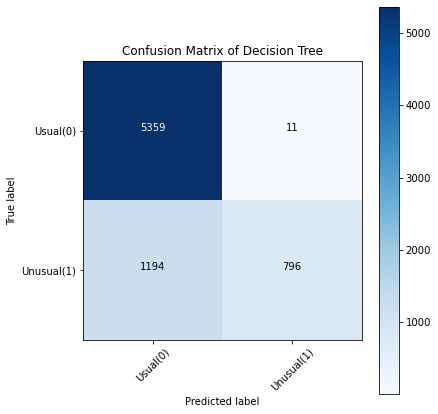

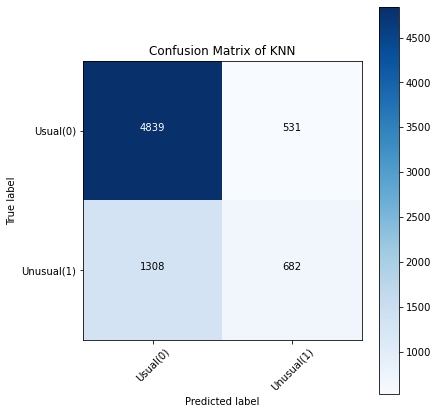

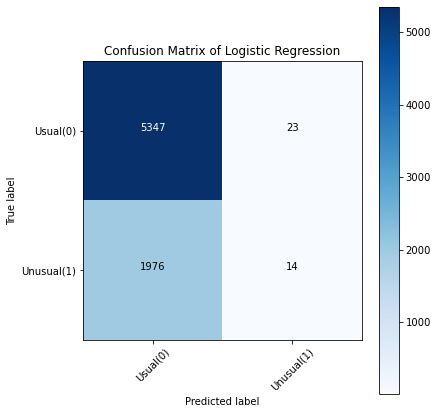

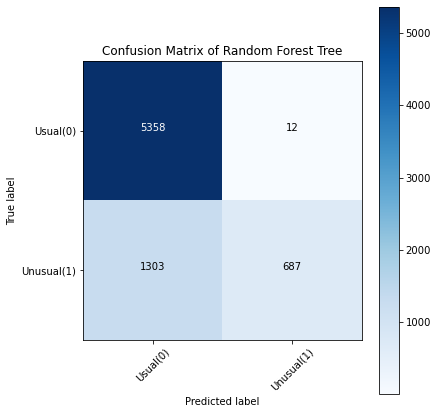

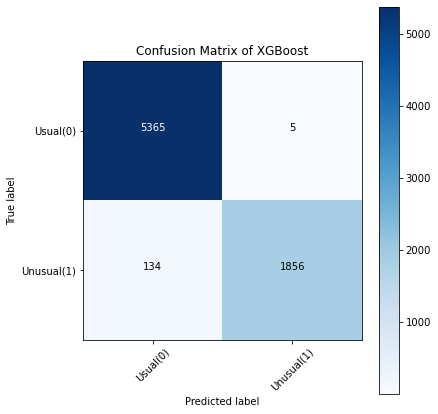

In [30]:
# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression
# svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machine
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1]) # XGBoost

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

# 1. Decision tree

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Usual(0)','Unusual(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

# 2. K-Nearest Neighbors

knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Usual(0)','Unusual(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()

# 3. Logistic regression

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Usual(0)','Unusual(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()


# 5. Random forest tree

rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Usual(0)','Unusual(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()

# # 6. XGBoost

xgb_cm_plot = plot_confusion_matrix(xgb_matrix, 
                                classes = ['Usual(0)','Unusual(1)'], 
                                normalize = False, title = 'XGBoost')
plt.savefig('xgb_cm_plot.png')
plt.show()

The XGBoost algorithm, short for Extreme Gradient Boosting, is simply an improvised version of the gradient boosting algorithm, and the working procedure of both is almost the same. One crucial point in XGBoost is that it implements parallel processing at the node level, making it more powerful and fast than the gradient boosting algorithm. XGBoost reduces overfitting and improves overall performance by including various regularization techniques by setting the hyperparameters of the XGBoost algorithm.

